# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly 
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot

import folium

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_excel('Covid cases in India.xlsx')

In [4]:
df 

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [5]:
df.drop(['S. No.'],axis=1,inplace=True)

In [6]:
df.columns

Index(['Name of State / UT', 'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )', 'Cured', 'Death'],
      dtype='object')

Let's find out the total number of cases by summing the 2 columns of confirmed cases.

In [7]:
df['Total Cases']  = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [8]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


Finding the total number of cases in India till now

In [9]:
total_cases_overall = df['Total Cases'].sum() 
print('Total number of REPORTED CASES in INIDA till now : -',total_cases_overall)

Total number of REPORTED CASES in INIDA till now : - 729


Creating a  new Column for Active Cases

In [10]:
df['Active Cases']  = df['Total Cases'] - (df['Death']+df['Cured'])

In [11]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [12]:
total_active_cases_overall = df['Active Cases'].sum() 
print('Total number of ACTIVE CASES in INIDA as of now : -',total_active_cases_overall)

Total number of ACTIVE CASES in INIDA as of now : - 648


The Case Load level of every state can be visualised by background gradients

In [13]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [14]:
Total_Active_cases = df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()

In [15]:
Total_Active_cases

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Gujarat,40
Rajasthan,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [16]:
Total_Active_cases.style.background_gradient(cmap='Reds')

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Gujarat,40
Rajasthan,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


# Graphical Representation of Data

In [17]:
plt.rcParams['figure.figsize']=20,12  # To view bigger size graphs

<AxesSubplot:xlabel='Name of State / UT'>

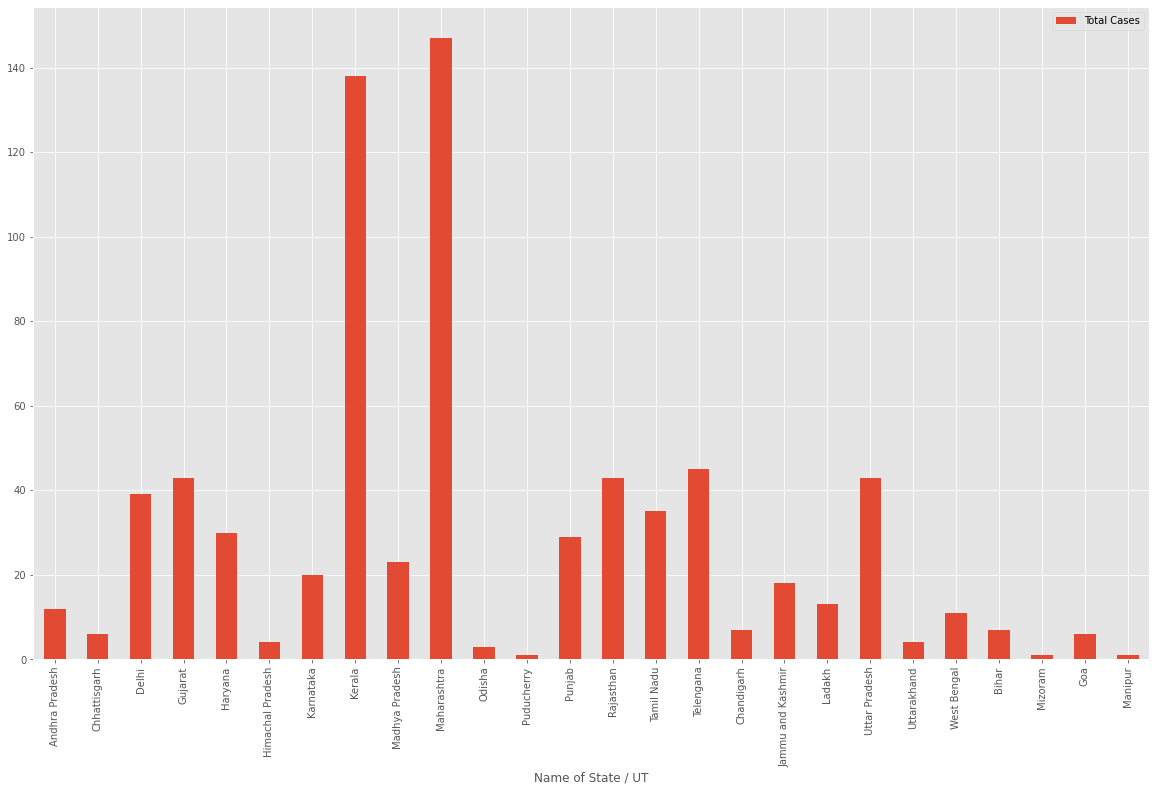

In [18]:
#Pandas Visualization
df.plot(kind = 'bar', x = "Name of State / UT",y="Total Cases")

<BarContainer object of 26 artists>

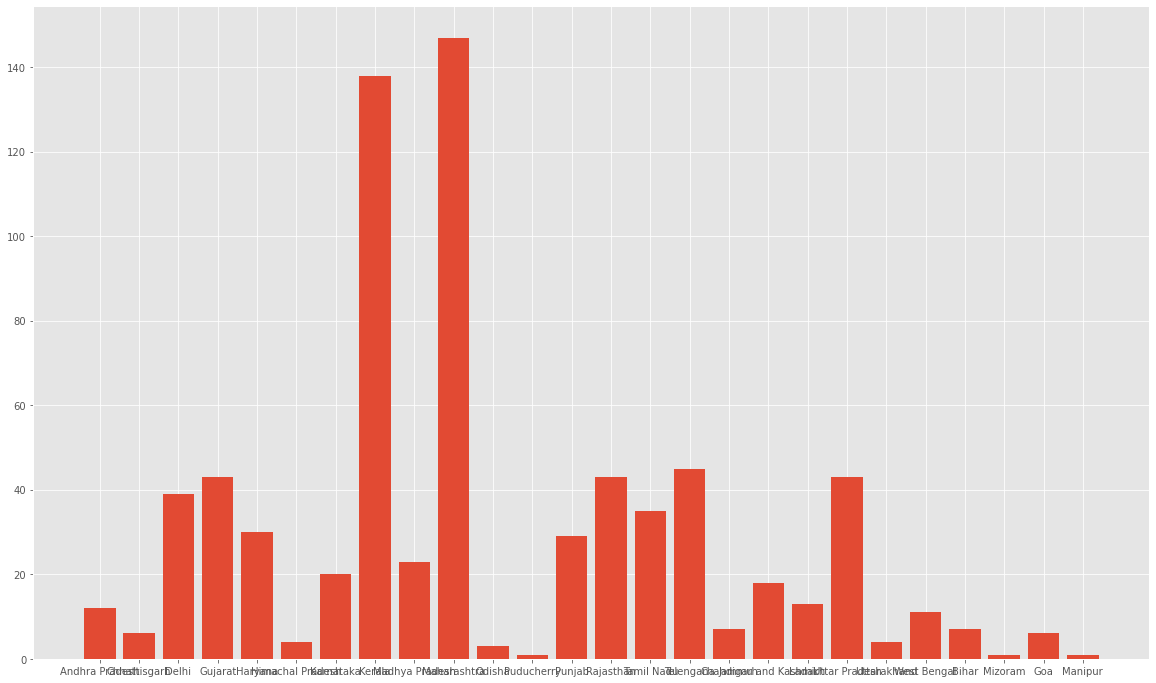

In [19]:
# Matplotlib based visualization
plt.bar(df["Name of State / UT"],df["Total Cases"])

In [20]:
px.bar(df,x = "Name of State / UT",y="Total Cases")

## Scatter Plot 

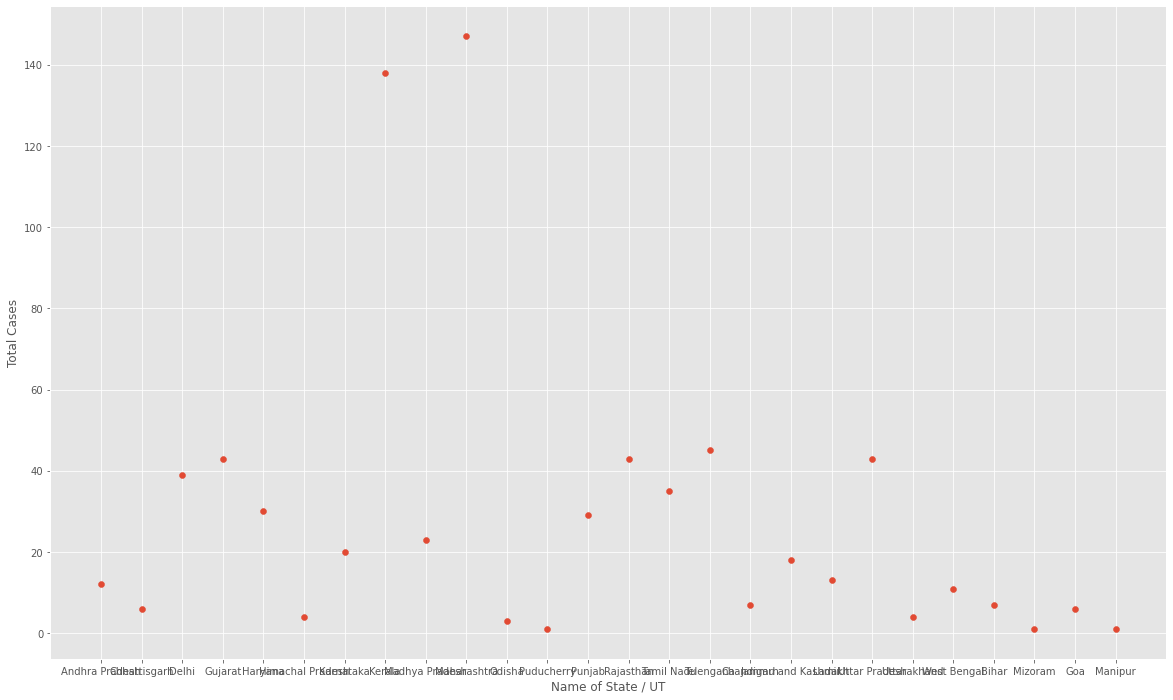

In [21]:
# Pandas Visualization
df.plot(kind='scatter',x = "Name of State / UT",y="Total Cases")
# Matplotlib Visualization
plt.scatter(df['Name of State / UT'],df['Total Cases'])

In [22]:
# PLotly visualization
df.iplot(kind='scatter',x = "Name of State / UT",y="Total Cases",title='State-Wise Analysis',mode='markers+lines',
        xTitle = "Name of State / UT", yTitle = "Total Cases")
# Plotly Express visualization
px.scatter(df,x = "Name of State / UT",y="Total Cases",title='State-Wise Analysis')

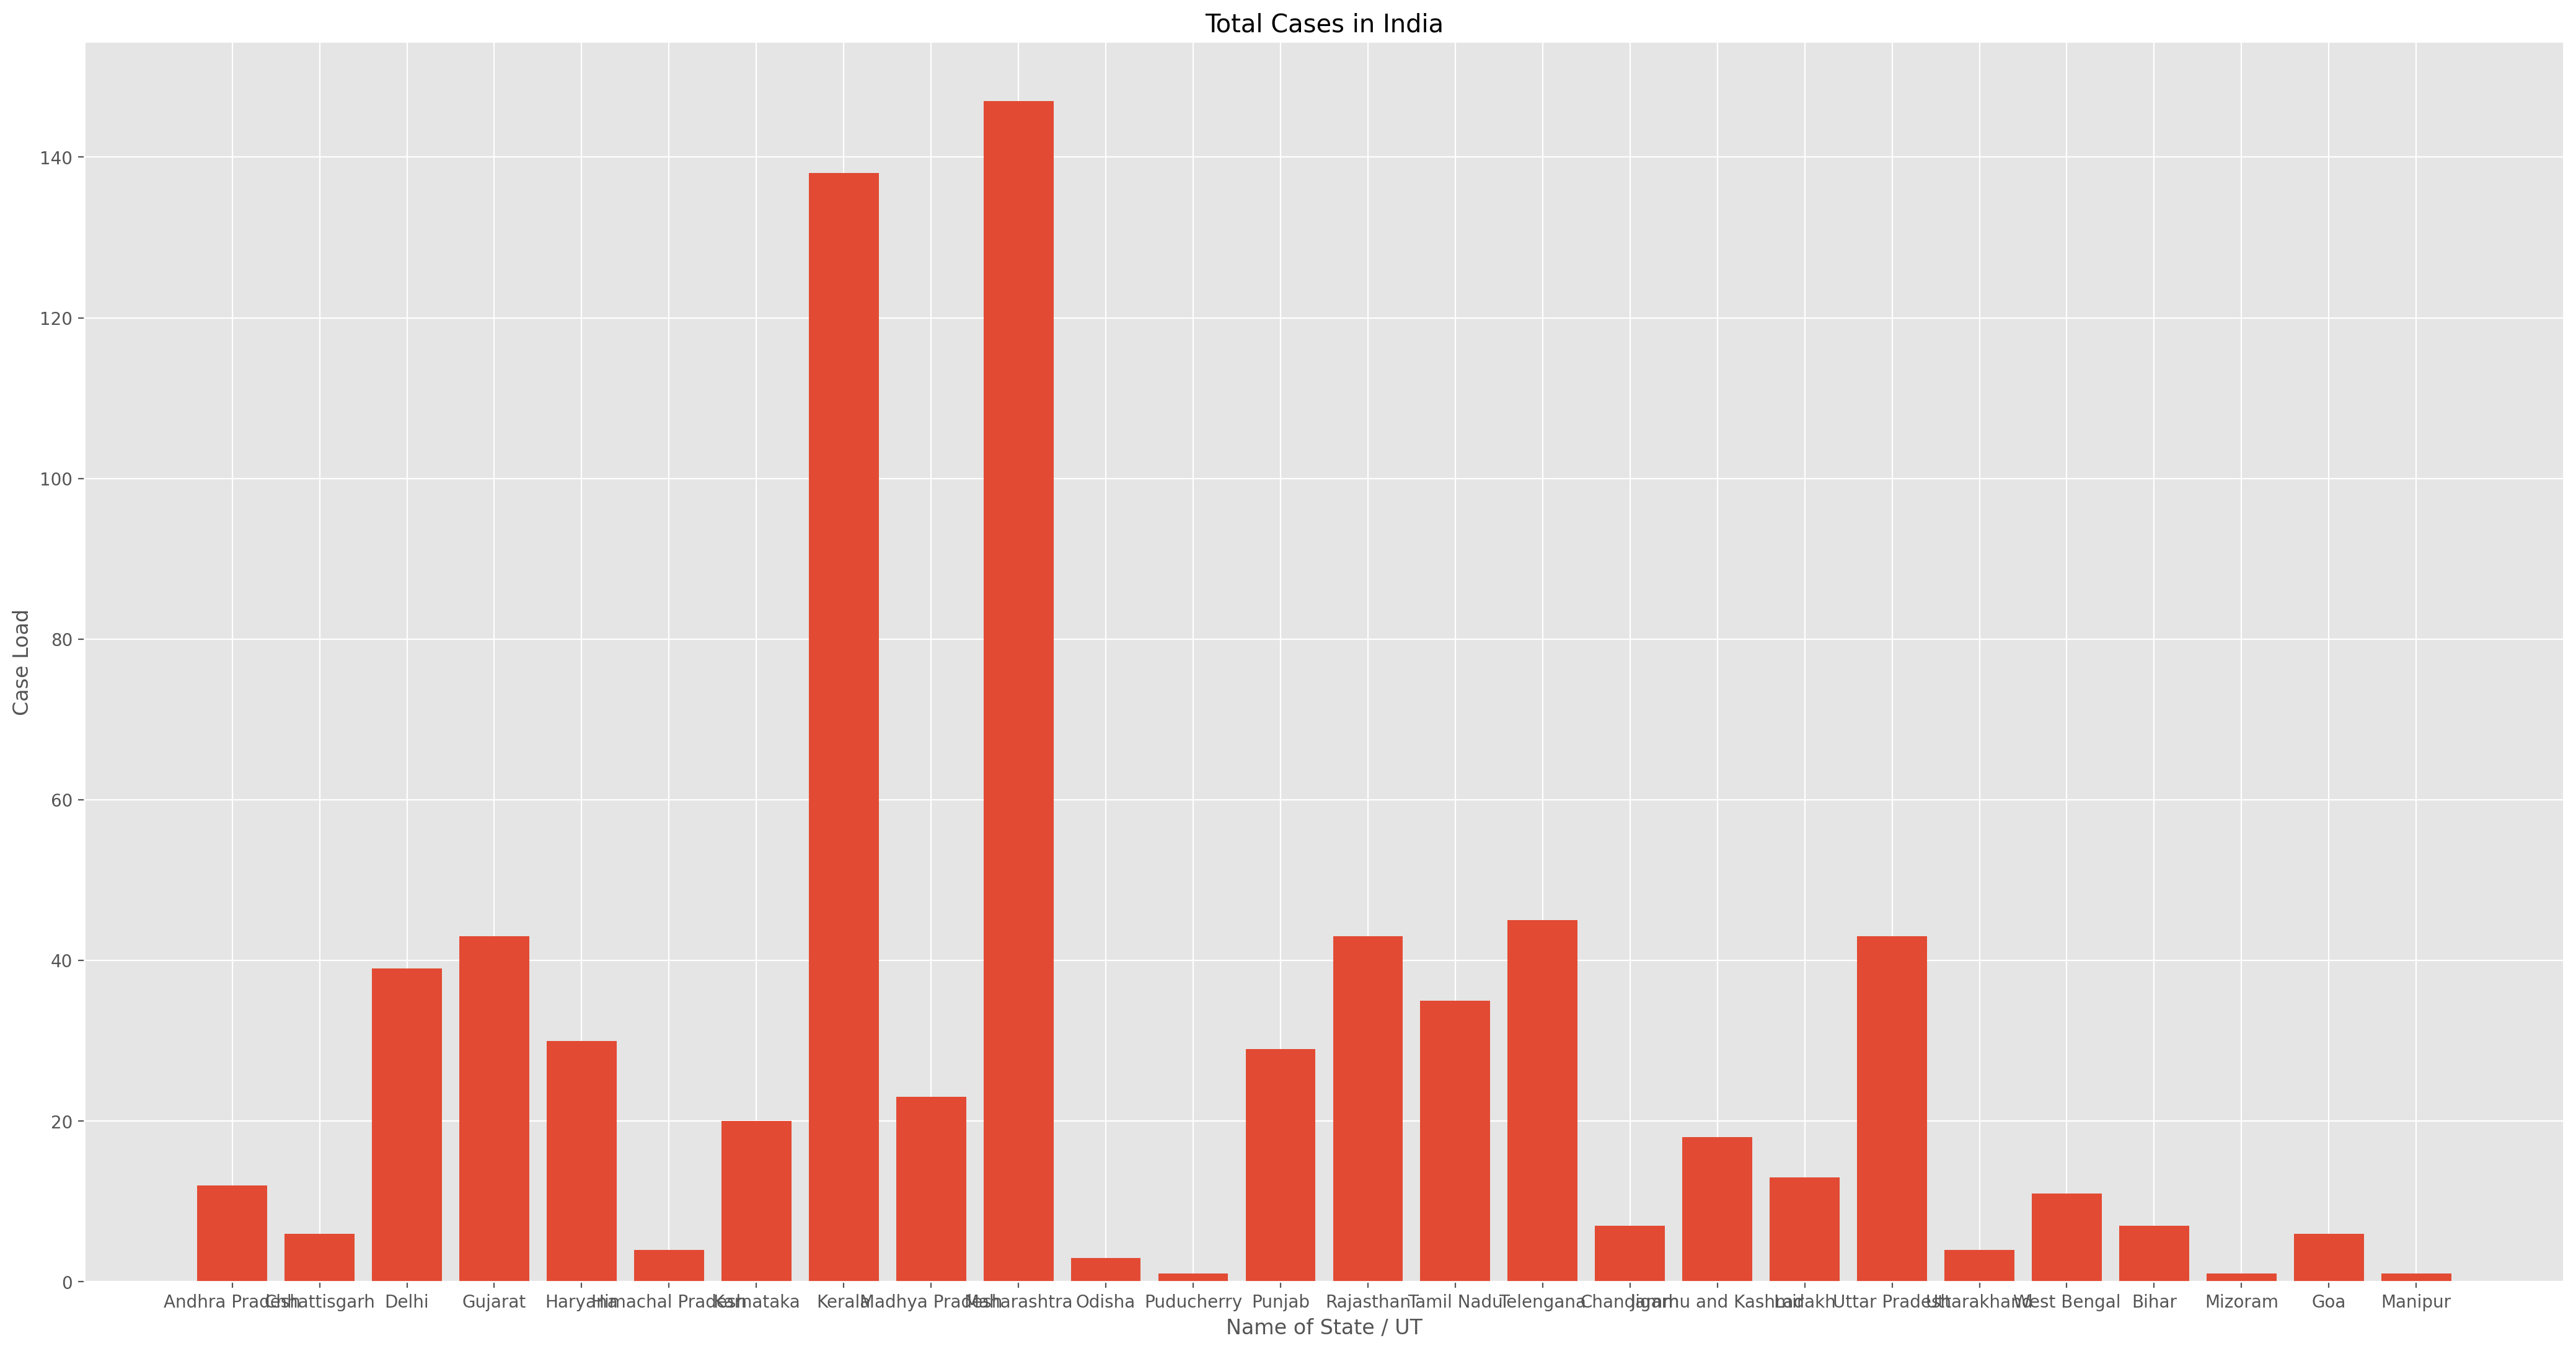

In [23]:
# Object Oriented Visualization
fig = plt.figure(figsize=(20,10),dpi=200)
axes = fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total Cases'])
axes.set_title('Total Cases in India')
axes.set_xlabel('Name of State / UT')
axes.set_ylabel('Case Load')
plt.show()

# Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total Cases']))
fig.update_layout(title = "Total Cases in India",xaxis = dict(title = "Name of the State/UT"),yaxis = dict(title='Case Load'))

## Map Based Visualization 

In [24]:
Indian_Cord  = pd.read_excel('Indian Coordinates.xlsx')

In [25]:
Indian_Cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [26]:
df_full = pd.merge (Indian_Cord,df,on='Name of State / UT')

In [27]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.4,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)
    

In [28]:
map

# Global Case Analysis -  Comparative Analysis of India, Italy, China & South Korea

In [29]:
dbd_india = pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name = "India")
dbd_italy = pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name = "Italy")
dbd_korea = pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name = "Korea")
dbd_china = pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name = "Wuhan")

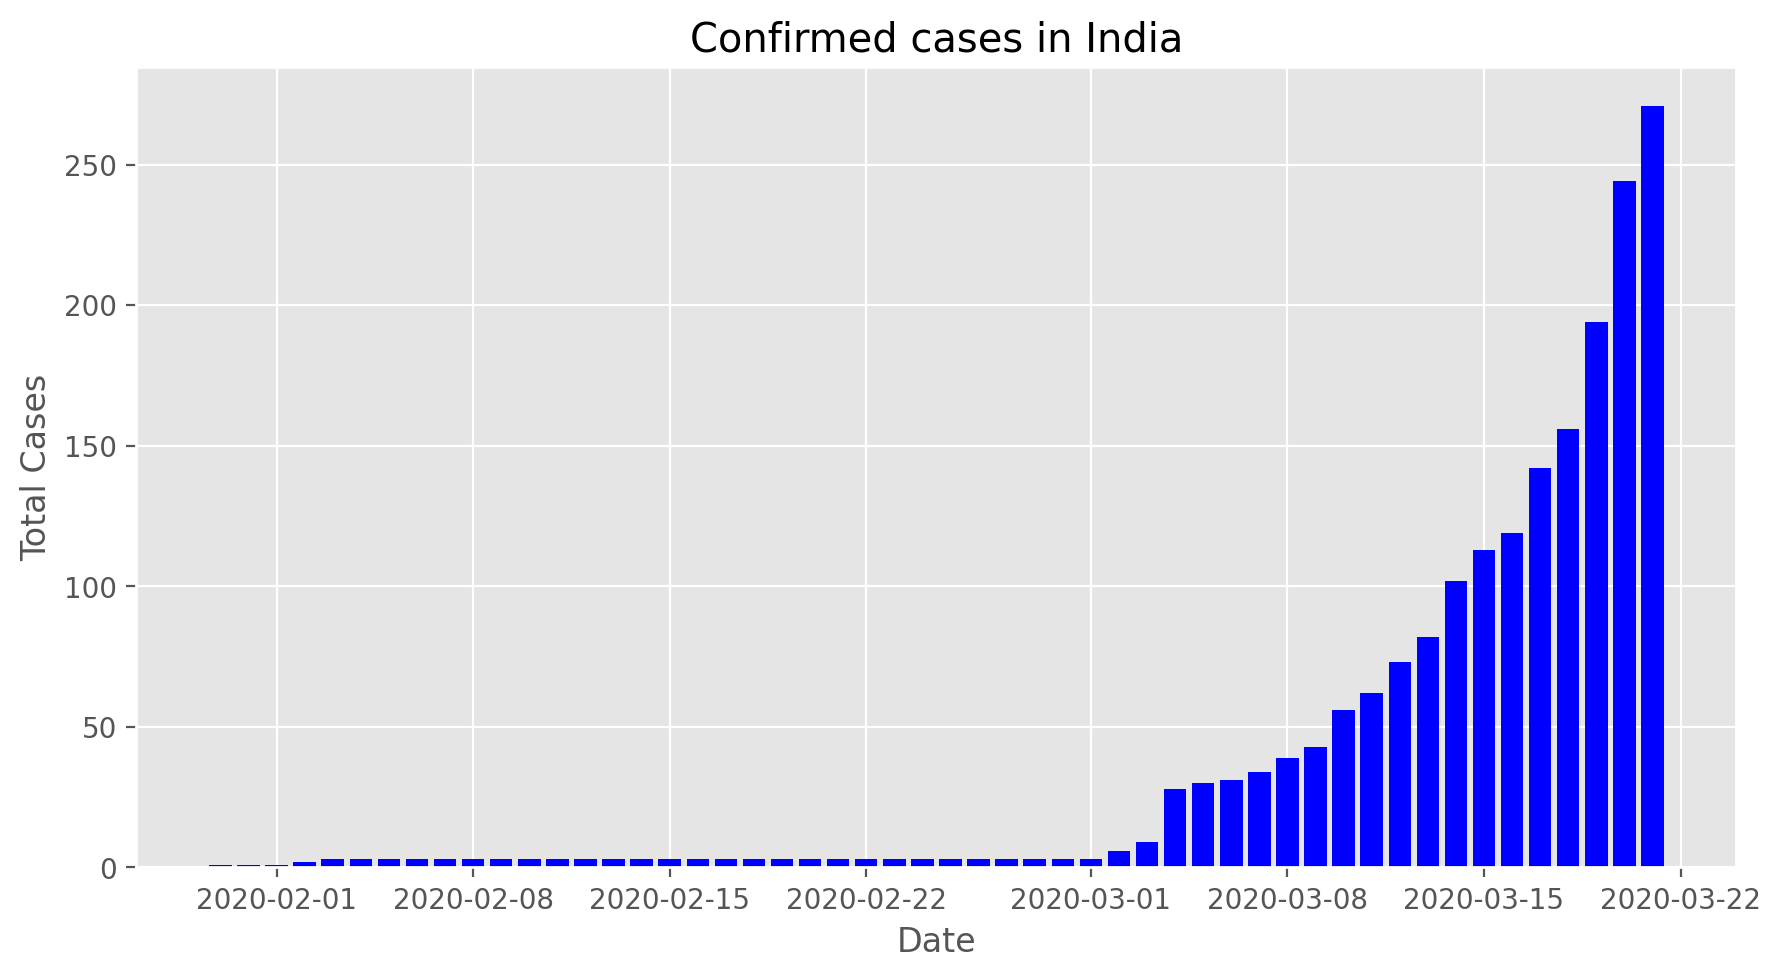

In [30]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes ([0.1,0.1,0.8,0.8])
axes.bar(dbd_india["Date"],dbd_india["Total Cases"],color = 'blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()

# Using Plotly
fig = px.bar(dbd_india,x="Date",y="Total Cases",color = 'Total Cases',title="Confirmed cases in India")
fig.show()

In [31]:
fig = px.bar(dbd_china,x="Date",y="Total Cases",color = 'Total Cases',title="Confirmed cases in Wuhan")
fig.show()

In [32]:
fig = px.bar(dbd_korea,x="Date",y="Total Cases",color = 'Total Cases',title="Confirmed cases in South Korea")
fig.show()

In [33]:
fig = px.bar(dbd_italy,x="Date",y="Total Cases",color = 'Total Cases',title="Confirmed cases in Italy")
fig.show()

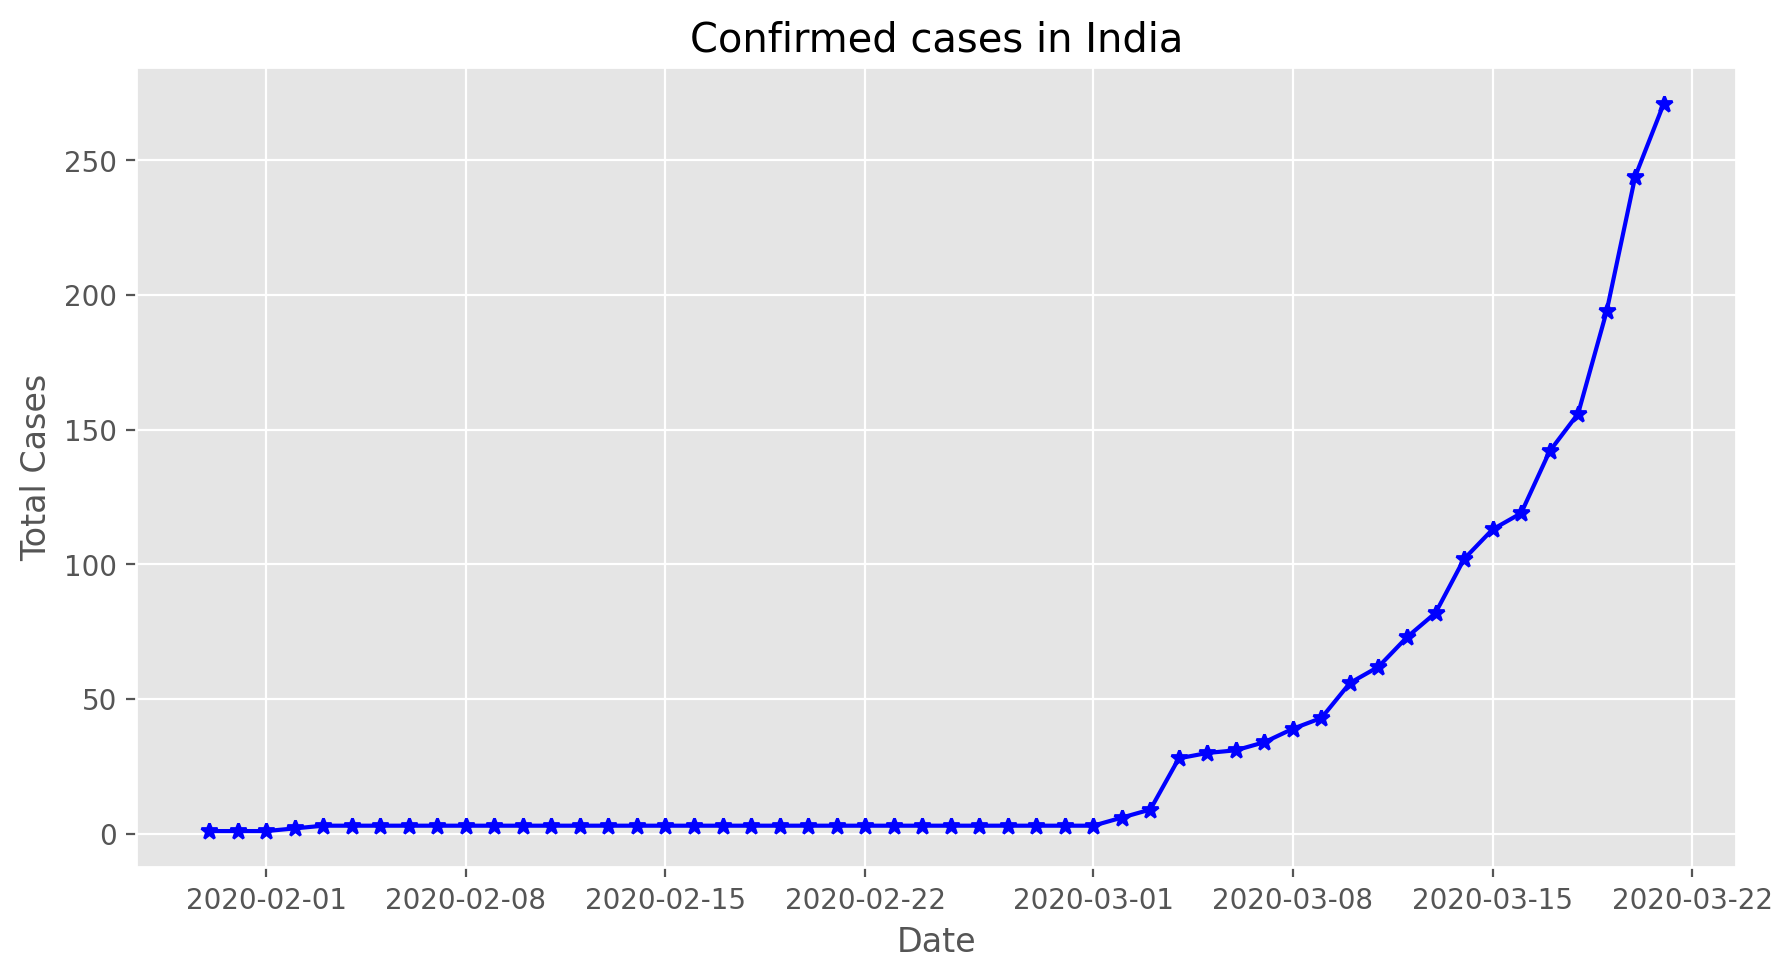

In [34]:
# Scatter Plot with line
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes ([0.1,0.1,0.8,0.8])
axes.plot(dbd_india["Date"],dbd_india["Total Cases"],color = 'blue',marker='*')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()

# Using Plotly Express
fig = px.scatter(dbd_india,x="Date",y="Total Cases",color = 'Total Cases',title="Confirmed cases in India")
fig.show()

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_india["Date"],y=dbd_india["Total Cases"],mode='lines+markers'))
fig.update_layout(title = "Daily confirmed Cases in India",xaxis = dict(title = "Date"),yaxis = dict(title='Case Load'))

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_china["Date"],y=dbd_china["Total Cases"],mode='lines+markers'))
fig.update_layout(title = "Daily confirmed Cases in Wuhan",xaxis = dict(title = "Date"),yaxis = dict(title='Case Load'))

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_korea["Date"],y=dbd_korea["Total Cases"],mode='lines+markers'))
fig.update_layout(title = "Daily confirmed Cases in South Korea",xaxis = dict(title = "Date"),yaxis = dict(title='Case Load'))

In [38]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_italy["Date"],y=dbd_italy["Total Cases"],mode='lines+markers'))
fig.update_layout(title = "Daily confirmed Cases in Italy",xaxis = dict(title = "Date"),yaxis = dict(title='Case Load'))

In [39]:
from plotly.subplots import make_subplots

In [40]:
#Subplots of bar graphs
fig=make_subplots(rows=2,cols=2,
                specs=[[{'secondary_y':True},{'secondary_y':True}],[{'secondary_y':True},{'secondary_y':True}]],
                 subplot_titles=("South Korea","Italy","India","China(Wuhan)"))
fig.add_trace(go.Bar(x=dbd_korea['Date'],y=dbd_korea['Total Cases'],
                    marker=dict(color=dbd_korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=dbd_italy['Date'],y=dbd_italy['Total Cases'],
                    marker=dict(color=dbd_italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=dbd_india['Date'],y=dbd_india['Total Cases'],
                    marker=dict(color=dbd_india['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=dbd_china['Date'],y=dbd_china['Total Cases'],
                    marker=dict(color=dbd_china['Total Cases'],coloraxis="coloraxis")),2,2)

fig.update_layout(coloraxis=dict(colorscale = 'Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")
fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [41]:
# Joint Scatter plot
fig=make_subplots(rows=2,cols=2,
                specs=[[{'secondary_y':True},{'secondary_y':True}],[{'secondary_y':True},{'secondary_y':True}]],
                 subplot_titles=("South Korea","Italy","India","China(Wuhan)"))
fig.add_trace(go.Scatter(x=dbd_korea['Date'],y=dbd_korea['Total Cases'],
                    marker=dict(color=dbd_korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Scatter(x=dbd_italy['Date'],y=dbd_italy['Total Cases'],
                    marker=dict(color=dbd_italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Scatter(x=dbd_india['Date'],y=dbd_india['Total Cases'],
                    marker=dict(color=dbd_india['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Scatter(x=dbd_china['Date'],y=dbd_china['Total Cases'],
                    marker=dict(color=dbd_china['Total Cases'],coloraxis="coloraxis")),2,2)

fig.update_layout(coloraxis=dict(colorscale = 'Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")
fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [42]:
df = pd.read_csv('covid_19_data.csv',parse_dates=['Last Update'])

In [43]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [44]:
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)

In [45]:
df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [46]:
df.query('Country == "India"')

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,2020-01-30 16:00:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,2020-01-31 23:59:00,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,2020-01-31 08:15:00,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02 06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
740,741,02/04/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
810,811,02/05/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
881,882,02/06/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
954,955,02/07/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
1026,1027,02/08/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0


In [47]:
df.groupby('Date').sum() # Daily total cases in whole world

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


In [48]:
confirm = df.groupby('Date').sum()['Confirmed'].reset_index()
dead = df.groupby('Date').sum()['Deaths'].reset_index()
Recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [49]:
confirm

,Date,Confirmed
0,01/22/2020,555.0
1,01/23/2020,653.0
2,01/24/2020,941.0
3,01/25/2020,1438.0
4,01/26/2020,2118.0
5,01/27/2020,2927.0
6,01/28/2020,5578.0
7,01/29/2020,6165.0
8,01/30/2020,8235.0
9,01/31/2020,9925.0


In [50]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirm['Date'],y=confirm['Confirmed'],mode='lines+markers',name='Confirmed Cases',
                        line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=dead['Date'],y=dead['Deaths'],mode='lines+markers',name='Deaths',
                        line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=Recovered['Date'],y=Recovered['Recovered'],mode='lines+markers',name='Recovered Patients',
                        line=dict(color='green',width=2)))

In [51]:
df_confirm = pd.read_csv('time_series_covid_19_confirmed.csv')
df_confirm.rename(columns={'Country/Region':'Country'},inplace=True)

In [52]:
df_latlong = pd.merge(df,df_confirm,on=['Country','Province/State'])

In [53]:
df_latlong

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
2,118,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
3,159,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,203,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,5879,03/15/2020,NaN,Saint Vincent and the Grenadines,2020-03-14 16:33:03,1.0,0.0,0.0,12.9843,-61.2872,...,0,0,0,0,0,0,0,0,0,1
3286,5625,03/14/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3287,5881,03/15/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3288,5628,03/14/2020,"Virgin Islands, U.S.",US,2020-03-14 16:15:18,1.0,0.0,0.0,18.3358,-64.8963,...,0,0,0,0,0,0,0,0,0,1


In [54]:
fig = px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",hover_data=['Confirmed','Deaths','Recovered'],
                        animation_frame="Date",color_continuous_scale="Portland",radius=7,zoom=0,height=700)

In [55]:
fig.update_layout(title = "World-Wide Corona Virus Cases")
fig.update_layout(mapbox_style = "open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})